### Gradient Descent From Scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
X = np.random.normal()

In [3]:
X = np.arange(-3, 3, 0.1)
#np.linspace
#range() in python

In [4]:
slope = 2
intercept = -1.5
noise = np.random.normal(0, 1, size=len(X))

In [5]:
y = slope*X + intercept + noise

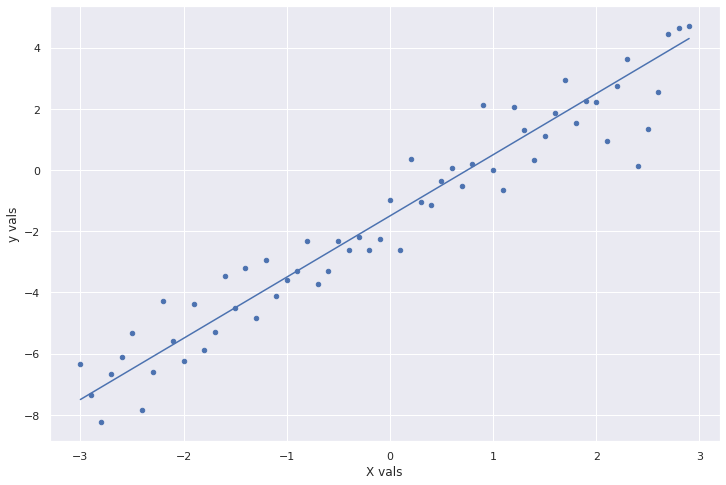

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=20)
plt.xlabel('X vals')
plt.ylabel('y vals')
plt.plot(X, slope*X + intercept)

### GOAL:
- We want to write some code where the algorithm figures out the slope of 2 and intercept of -1.5 all by itself.
- The algorithm (Gradient Descent) will solve the parameters:
    - **slope** ($\omega_1$)
    - **intercept** ($\omega_0$)

In [7]:
def make_line(x:np.array, w_0:float, w_1:float) -> np.array:
    """
    Given some input data and an intercept and slope,
    generate a prediction, i.e. make a line
    
    w_0 is our intercept.
    w_1 is our slope.
    """
    
    ypred = x*w_1 + w_0

    return ypred

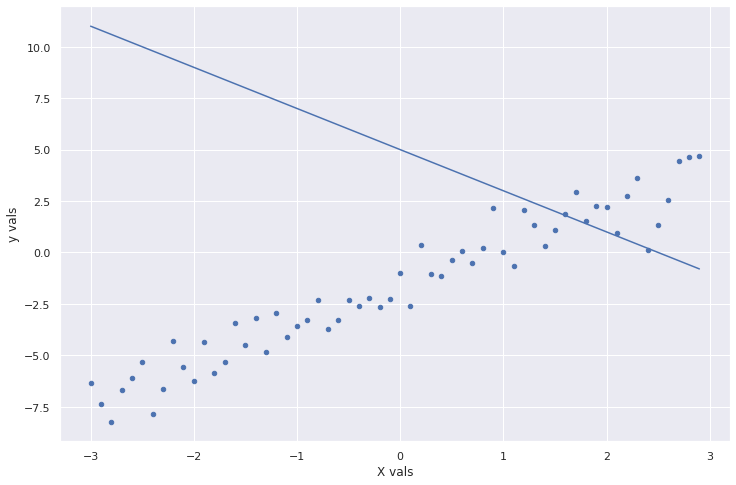

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=20)
plt.xlabel('X vals')
plt.ylabel('y vals')
plt.plot(X, make_line(X, 5, -2))

We need a way to tell our algorithm how bad its doing at any given time. We call this the error / **loss function**:
- MSE

In [9]:
def mse(ytrue:np.array, ypred:np.array):
    """Calculate Mean Squared Error"""
    error = np.mean((ytrue-ypred)**2)
    return error

In [10]:
mse(y, make_line(X, 5, -2))

92.23403972825054

In [11]:
mse(y, make_line(X, 3, -1))

48.289955351416

In [12]:
mse(y, make_line(X, 1.5, 0))

21.685172298483238

In [13]:
mse(y, make_line(X, -1.5, 2))

0.8856061926176911

---
---

**What we have so far:**
- the ability to make a prediction (given some slope and intercept)
- the ability to quantify how good or bad our prediction is.
    - We want to decrease the error (MSE) down to zero (or as close to zero as possible)
    
**What we don't have so far:**
- the ability to tell our algorithm IN WHICH DIRECTION it should update the parameters such that the next guess is better than before.
- Let's add in that functionality, using derivatives!

In [14]:
def calc_gradient(xdata, ytrue, intercept, slope):
    
    """This function's job is to gauge the right direction to move next."""

    dw = 0.0001 #step size
    ypred = make_line(xdata, intercept, slope) #first guess! (it's probably bad, but that's ok)

    '''tweak first parameter'''
    intercept_change = intercept + dw
    # calculate predictions using w0 and w1_change
    ypred_intercept = make_line(xdata, intercept_change, slope) 
    #our guess if all we did was slightly change the intercept
    
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw
    # NUMERATOR: 
    # the change in the error (MSE) as a result of a slight increase in the intercept
    # DENOMINATOR: 
    # the slight increase in the intercept

    '''tweak second parameter'''
    slope_change = slope + dw
    # calculate predictions using w0_change and w1
    ypred_slope = make_line(xdata, intercept, slope_change) 
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

    return [deriv_intercept, deriv_slope] 
    # return both derivations as a list

In [15]:
calc_gradient(X, y, 5, -2)

[13.572035980899955, -24.001578914862876]

- The positive first value (13.36) tells us that if we were to increase that parameter (intercept), then the error would go UP (positive)
    - this tells us that we should NOT increase the intercept, but rather decrease it.
    
- The negative second value (-24.93) tells us that if we were to increase that parameter (slope), then the error would go DOWN (negative)
    - which is good! Keep going in that direction!!!
    
- But the fact that the magnitude (absolute value) of the slope derivative is larger than that of the intercept tells us that given our current step size, there is much more potential for decreasing the error with the slope than the intercept.

The ``calc_gradient`` function above basically gives us directionality: 
- Would the error go up or down if I increased slope ever so slightly?
- Would the error go up or down if I increased intercept ever so slightly?

In [16]:
calc_gradient(X, y, 5, -2)
# if the gradients / derivatives are close to zero, this means that we're already very close to the bottom of the error function.

[13.572035980899955, -24.001578914862876]

---
---

**Now let's put all the pieces together!**
- The Gradient Descent Algorithm

In [17]:
start_intercept = 500 # arbitrary starting value
start_slope = -200 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 100
THRESHOLD = 0.01 #if our gradient gets really small after a while we should stop

import time



for i in range(MAX_ITER):
    
    time.sleep(0.2)
    
    #1. Calculate the gradient of the loss function with respect to each model parameter.
    deriv_intercept, deriv_slope = calc_gradient(X, y, start_intercept, start_slope)
    
    new_intercept = start_intercept + (-deriv_intercept)*LR
    new_slope = start_slope + (-deriv_slope)*LR
    
    
    ypred = make_line(X, new_intercept, new_slope)
    
    if ((abs(deriv_slope) <= abs(THRESHOLD)) & (abs(deriv_intercept) <= abs(THRESHOLD))): 
        
        print("CONVERGED!")
        print("slope=",new_slope, "intercept=",new_intercept)
        print("Derivative",deriv_slope, deriv_intercept, THRESHOLD)
        break
        
    if i % 5 == 0:
        print(f'CURRENT INTERCEPT: {new_intercept}; CURRENT SLOPE: {new_slope}')
        print(f'CURRENT ERROR: {mse(y, ypred)}')
        print('-----')

    start_intercept = new_intercept
    start_slope = new_slope



    


CURRENT INTERCEPT: 397.6627964293584; CURRENT SLOPE: -73.78384202020243
CURRENT ERROR: 179614.4797110325
-----
CURRENT INTERCEPT: 128.7608542079397; CURRENT SLOPE: 4.271741109550931
CURRENT ERROR: 16978.57405636895
-----
CURRENT INTERCEPT: 41.182065974226134; CURRENT SLOPE: 2.9471786277099454
CURRENT ERROR: 1829.2596434780703
-----
CURRENT INTERCEPT: 12.446282621397131; CURRENT SLOPE: 2.238589432909066
CURRENT ERROR: 197.77821499029582
-----
CURRENT INTERCEPT: 3.015510153751677; CURRENT SLOPE: 2.0032522867794
CURRENT ERROR: 22.052531225129584
-----
CURRENT INTERCEPT: -0.07958920048611873; CURRENT SLOPE: 1.9259883158159852
CURRENT ERROR: 3.125392430502922
-----
CURRENT INTERCEPT: -1.095374722223097; CURRENT SLOPE: 1.900630643861767
CURRENT ERROR: 1.086829168280296
-----
CURRENT INTERCEPT: -1.4287469714299172; CURRENT SLOPE: 1.8923084666651713
CURRENT ERROR: 0.8672801863909008
-----
CURRENT INTERCEPT: -1.5381569346424318; CURRENT SLOPE: 1.88957719820122
CURRENT ERROR: 0.8436405304049098
